1. Raport powinien zawierać opis analizowanego zbioru danych, jego pochodzenie, autorów, podstawowe informacje o jego strukturze, opis cech występujących w zbiorze. Jasno określony cel analizy np. klasyfikacja, regresja oraz opis struktury raportu (ok. 1-2 strony A4). 

Zbiór danych pochodzi z artykułu dostępnego pod adresem [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191#f0010), zawierającego dane wyekstrahowane z baz SQL systemów zarządzania nieruchomościami (PMS) hoteli. Autorami są Nuno Antonio, Ana de Almeida oraz Luis Nunes.

Dane stanowią połączenie dwóch zbiorów:
  - H1 – dane hotelu wypoczynkowego, obejmujące 40 060 obserwacji.
  - H2 – dane hotelu miejskiego, obejmujące 79 330 obserwacji.
  
Oba zbiory mają identyczną strukturę, zawierając 31 zmiennych opisujących każdą rezerwację. Zostały połączone poprzez dodanie zmiennej określającej rodzaj hotelu, co pozwoliło na utworzenie zbioru wyjściowego z 32 zmiennymi. Dane dotyczą rezerwacji osób, które miały przybyć w okresie od 1 lipca 2015 do 31 sierpnia 2017, w tym zarówno rezerwacji zakończonych przybyciem, jak i odwołanych.

Celem analizy jest:

1. Identyfikacja zmiennych mających istotny wpływ na decyzję gości o anulowaniu rezerwacji.
2. Opracowanie modeli klasyfikacyjnych pozwalających na predykcję prawdopodobieństwa anulowania rezerwacji.


Opis cech występujących w zbiorze:
| Zmienna                       | Typ       | Opis                                                                                      |
|-------------------------------|-----------|-------------------------------------------------------------------------------------------|
| hotel                         | character | Hotel (H1 = Hotel wypoczynkowy lub H2 = Hotel Miejski)                                         |
| is_canceled                   | double    | Wartość wskazująca, czy rezerwacja została anulowana (1), czy nie (0)                    |
| lead_time                     | double    | Liczba dni od wprowadzenia rezerwacji do systemu PMS do daty przyjazdu                   |
| arrival_date_year             | double    | Rok daty przyjazdu                                                                       |
| arrival_date_month            | character | Miesiąc daty przyjazdu                                                                   |
| arrival_date_week_number      | double    | Numer tygodnia roku, w którym wypada data przyjazdu                                    |
| arrival_date_day_of_month     | double    | Dzień miesiąca, w którym wypada data przyjazdu                                         |
| stays_in_weekend_nights       | double    | Liczba noclegów w weekend (sobota / niedziela)                                         |
| stays_in_week_nights          | double    | Liczba noclegów w dni robocze (poniedziałek-piątek)                                      |
| adults                        | double    | Liczba osób dorosłych                                                                    |
| children                      | double    | Liczba dzieci                                                                            |
| babies                        | double    | Liczba niemowląt                                                                         |
| meal                          | character | Rodzaj wykupionego wyżywienia: Undefined/SC (brak), BB (nocleg i śniadanie), HB (śniadanie i jeden dodatkowy posiłek), FB (pełne wyżywienie: śniadanie, obiad i kolacja)     |
| country                       | character | Kraj pochodzenia gościa w formacie ISO 3155-3:2013                                       |
| market_segment                | character | Segment marketu: Online/Offline TA/TO ( rezerwacja przez internet/na żywo za pośrednictwem biur podróży/touroperatorów, Direct (bezpośrednio w hotelu), Corporate (rezerwacja przez firmę))                               |
| distribution_channel          | character | Kanał dystrybucji: TA, TO                          |
| is_repeated_guest             | double    | Czy gość jest powracający (1), czy nie (0)                                               |
| previous_cancellations        | double    | Liczba anulowanych rezerwacji przed obecną                                               |
| previous_bookings_not_canceled| double    | Liczba rezerwacji, które nie zostały anulowane przed obecną                              |
| reserved_room_type            | character | Standard/rodzaju pokoju zarezerwowanego                                                      |
| assigned_room_type            | character | Standard/rodzaju pokoju przydzielonego                                                       |
| booking_changes               | double    | Liczba zmian wprowadzonych do rezerwacji                                                |
| deposit_type                  | character | Typ zaliczki: No Deposit (brak), Non Refund (bezzwrotna), Refundable (zwrotna)          |
| agent                         | character | ID biura podróży                                                                         |
| company                       | character | ID firmy/podmiotu opłacającego rezerwację                                                |
| days_in_waiting_list          | double    | Liczba dni na liście oczekujących                                                        |
| customer_type                 | character | Typ rezerwacji: Contract, Group, Transient, Transient-party                              |
| adr                           | double    | Średnia dzienna stawka (ADR)                                                            |
| required_car_parking_spaces   | double    | Liczba wymaganych miejsc parkingowych                                                   |
| total_of_special_requests     | double    | Liczba specjalnych życzeń                                                                |
| reservation_status            | character | Ostatni status rezerwacji: Canceled(rezerwacja została anulowana przez klienta), Check-Out (klient zameldował się, ale już wyjechał), No-Show (klient nie zameldował się i poinformował hotelu o powodzie)                                 |
| reservation_status_date       | double    | Data ustawienia ostatniego statusu rezerwacji (anulowanie rezerwacji lub wemeldowanie się)                                           |

### Wczytanie danych i bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from pycaret.classification import *
from sklearn.preprocessing import normalize

In [2]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

2. Statystyki opisowe dla 5 wybranych cech wraz z wykresami np. histogram, wykres pudełkowy, wykres rozrzutu, informacje o typie danych, brakujących wartościach, o outlierach (ok. 6-10 stron). 

### Statystyki opisowe

In [153]:
def opis(kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q=np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]), decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]), decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]), decimals=2))
    print(f"Najczęściej występująca wartość dla {kolumna}:  {dane[kolumna].mode()[0]}")



#### lead_time

Na początek zajmiejmy się zmienną lead_time mówiącą nam o tym na ile dni przed planowanym przyjazdem dokonowana była rezerwacja

##### Liczność oraz podstawowe statystyki

In [172]:
print("3 najczęściej występujące wartości dla",dane['lead_time'].value_counts().head(3))
print()
opis('lead_time')

3 najczęściej występujące wartości dla lead_time
0    6345
1    3460
2    2069
Name: count, dtype: int64

Średnia dla lead_time:  104.01
Odchylenie standardowe dla lead_time:  106.86
Wariancja dla lead_time:  11419.63
Kwantyle dla lead_time:  [ 18.  69. 160.]
Minimum dla lead_time:  0
Mediana dla lead_time:  69.0
Maksimum dla lead_time:  737
Najczęściej występująca wartość dla lead_time:  0


Zmienna jest typu int64, ma wartości w zakresie od 0 do 737. Duża przedział sprawia, że najłatwiej będzie powiedzieć coś patrząc na wizualizację.

##### Wizualiacje

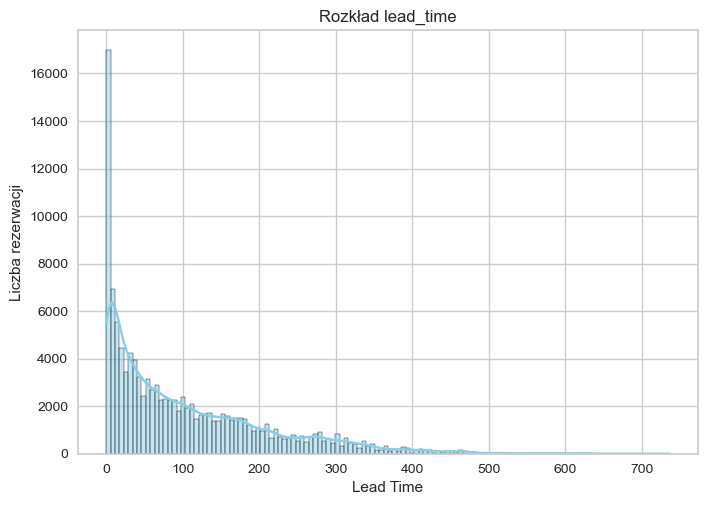

In [16]:
sns.histplot(dane['lead_time'], kde=True, color='skyblue')
plt.title("Rozkład lead_time")
plt.xlabel("Lead Time")
plt.ylabel("Liczba rezerwacji")
plt.show()

Wykres powyżej przedstawia rozkład zmiennej lead_time, która wskazuje czas (w dniach) pomiędzy dokonaniem rezerwacji a datą przyjazdu gościa.
Wartości na osi x reprezentują długości oczekiwania na przyjazd, a wysokość słupków pokazuje, jak często dany czas oczekiwania występuje w zbiorze danych. Możemy zauważyć, że znacząca liczba gości rezerwuje pokój do 10 dni przed planowaną datą przyjazdu oraz, że wraz ze wzrostem czasu od rezerwacji do przyjazdu maleje liczba osób dokonująca tych rezerwacji. W dalszej części analizy ze względu na cel predykcyjne będzie można przyjrzeć się sytuacji gdy ktoś wprowadza się od razu w dniu rezerwacji szczególnie gdy rezerwacji dokonuje bezpośrednio w hotelu, ponieważ może to nie nieść znaczącej dla nas informacji.

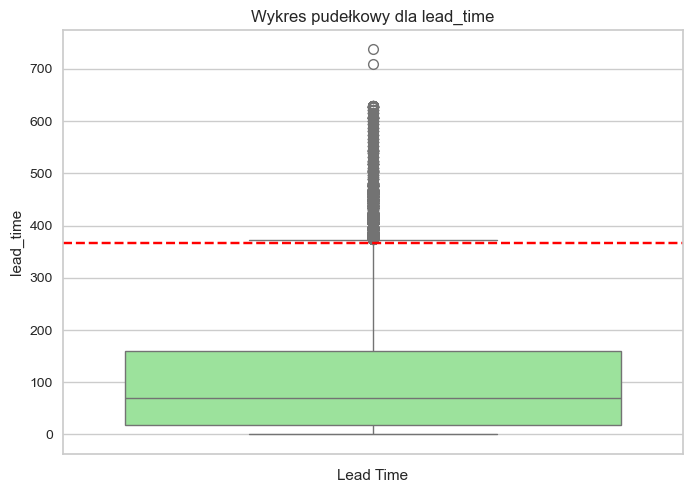

In [55]:
sns.boxplot(y=dane['lead_time'], color='lightgreen', )
plt.axhline(y=366, color='red', linestyle='--')
plt.title("Wykres pudełkowy dla lead_time")
plt.xlabel("Lead Time")
plt.show()

Wykres powyżej ponownie przedstawia rozkład zmiennej lead_time. Czerwoną przerywaną linią zaznaczony jest czas poprzedzający przyjazd równy 366 dni ( ze względu na to, że rok 2016 był przestępny). Zauważmy, że linia ta niemal, że pokrywa końcówkę wąsa odpowiadającą wartości maksymalnej, która nie jest odstająca. Może to oznaczać, że nietypowym zachowaniem jest rezerwacja hotelu na dłużej niż rok przed przyjazdem. Możemy również zauważyć, że połowa rezerwacji odbywa się na około 2 miesiące przed przyjazdem.

#### is_canceled

Teraz przyjrzymy się zmiennej, którą będziemy predyktować. Zaczniemy od sprawdzenia typu zmiennej, liczność klas oraz sprawdzeniu czy występują braki danych.

In [ ]:
dane['is_canceled'].dtypes

dtype('int64')

In [ ]:
print(dane['is_canceled'].value_counts())

is_canceled
0    75166
1    44224
Name: count, dtype: int64


Zmienna jest typu int64 oraz jest w miarę zrównoważona.

##### Wizualizacje

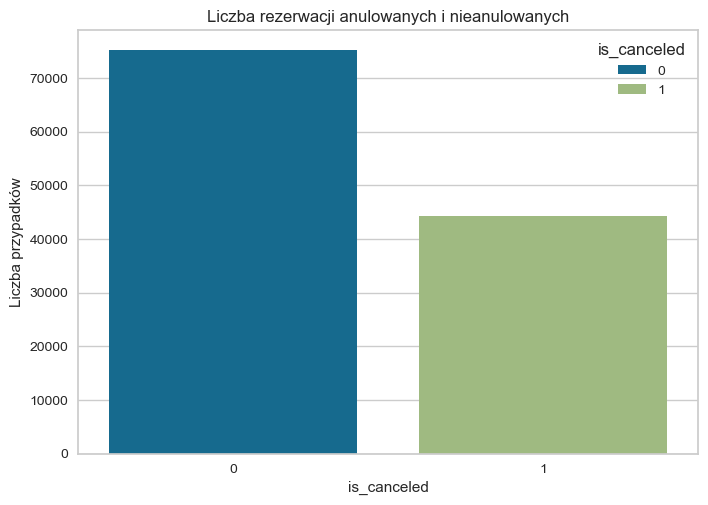

In [173]:
sns.countplot(x='is_canceled', data=dane, hue='is_canceled')
plt.title('Liczba rezerwacji anulowanych i nieanulowanych')
plt.xlabel('is_canceled')
plt.ylabel('Liczba przypadków')
plt.show()

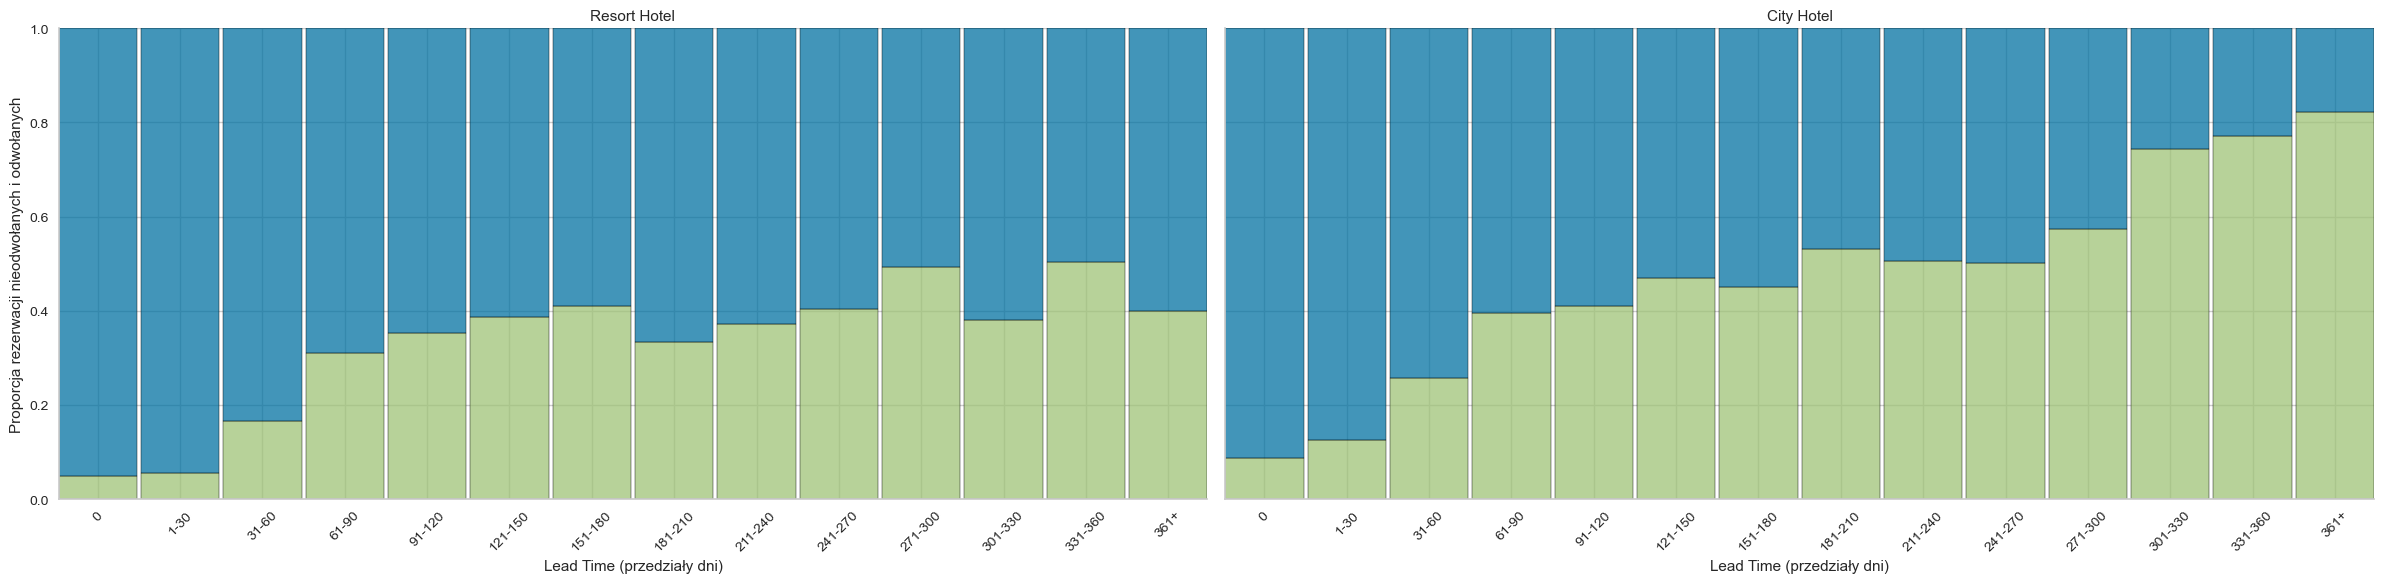

In [ ]:
bins = [-1, 0] + list(range(1, 366, 30))  # Przedział dla dnia 0: [-1, 0]
labels = ['0'] + [f'{i}-{i+29}' for i in range(1, 336, 30)] + ['361+']

# Tworzymy wykres FacetGrid z większą wysokością i odpowiednią proporcją
g = sns.FacetGrid(dane, col='hotel', height=6, aspect=2, col_wrap=2)
g.map_dataframe(
    sns.histplot,
    x=pd.cut(dane['lead_time'], bins=bins, labels=labels, include_lowest=True),
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.95,
)

# Dostosowanie wykresu
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Lead Time (przedziały dni)", "Proporcja rezerwacji nieodwołanych i odwołanych")


# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

Powyższe wykresy przedstawiają jak w zależności od hotelu wyglądają proporcję anulowania (anulowanie kolorem jasnozielonym, nieanulowanie kolorem niebieskim) w okresach 30 dniowych. Wydzielone zostało również 0, ze względu na to, że często mogłobyć to bezpośrednie wprowadzenie do hotelu. W przypadku obu hoteli jeśli rezerwacja odbyła się na od 1 do 30 dni to w przypadku hotelu w mieście tylko 15% rezerwacji została anulowana a jeśli ktoś wprowadzał się w dniu rezerwacji to anulowane było raptem 10% rezerwacji. W przypadku hotelu wypoczynkowego sytuacja jest nawet lepsza bo dla okresu od dnia 0 do 30 anulowanych jest tylko około 5% rezerwacji. Jeśli rezerwacja odbyła się na więcej dni przed przyjazdem to w obu przypadkach proporcja anulowanchy rezerwacji się zwiększa. W przypadku hotelu wypoczynkowego oscyluje wokół 40% zaś w przypadku hotelu w mieście rośnie bez przerwy osiągając około 80% dla dni 361+. Może być to jednak spowodowane małą ilością danych dla, których lead_time był aż tak wysoki.